# Long Short-Term Memory (LSTM) 

In [0]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

##Load & Prep FX Data

In [5]:
# Load data
fx1 = pd.read_csv('USD_CAD 200205-2004.csv')
fx2 = pd.read_csv('USD_CAD 2005-2009.csv')
fx3 = pd.read_csv('USD_CAD 2010-2014.csv')
fx4 = pd.read_csv('USD_CAD 2015-201907.csv')
# fx4=fx4.reset_index(drop=True)
# fx4.head()

,FX,Time,Open,High,Low,Close,Volume
0,USD_CAD,2015-01-01,1.161050,1.17862,1.15999,1.178415,16558
1,USD_CAD,2015-01-04,1.178390,1.18434,1.17434,1.176020,21274
2,USD_CAD,2015-01-05,1.176250,1.18398,1.17304,1.183645,31010
3,USD_CAD,2015-01-06,1.183645,1.18744,1.18133,1.181485,36879
4,USD_CAD,2015-01-07,1.181910,1.18444,1.17968,1.183015,25373


In [8]:
# Combine data
frames = [fx1, fx2, fx3, fx4]
fxtrade_dataset = pd.concat(frames)
fxtrade_dataset.head()

,FX,Time,Open,High,Low,Close,Volume
0,USD_CAD,2002-05-07,1.57005,1.57005,1.57005,1.57005,1
1,USD_CAD,2002-05-08,1.56525,1.56525,1.56525,1.56525,1
2,USD_CAD,2002-05-09,1.55850,1.55850,1.55850,1.55850,1
3,USD_CAD,2002-05-10,1.55850,1.55850,1.55850,1.55850,1
4,USD_CAD,2002-05-12,1.55395,1.55395,1.55395,1.55395,1


In [9]:
# Sort DataFrame by date
fxtrade_dataset = fxtrade_dataset.head().sort_values('Time')
# Double check the result
fxtrade_dataset.head()

,FX,Time,Open,High,Low,Close,Volume
0,USD_CAD,2002-05-07,1.57005,1.57005,1.57005,1.57005,1
1,USD_CAD,2002-05-08,1.56525,1.56525,1.56525,1.56525,1
2,USD_CAD,2002-05-09,1.55850,1.55850,1.55850,1.55850,1
3,USD_CAD,2002-05-10,1.55850,1.55850,1.55850,1.55850,1
4,USD_CAD,2002-05-12,1.55395,1.55395,1.55395,1.55395,1


## Plot Original Data

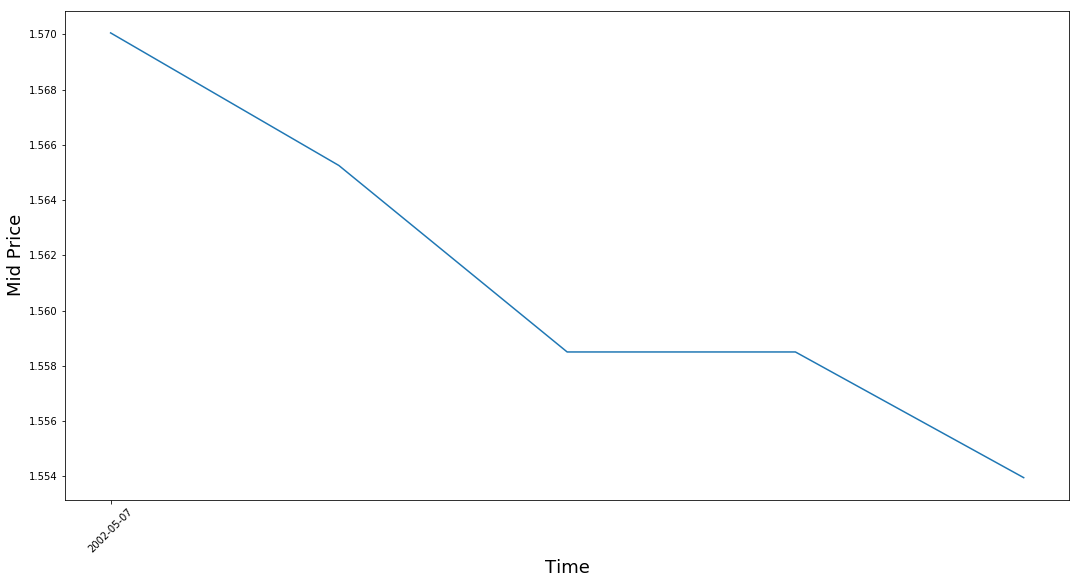

In [11]:
plt.figure(figsize = (18,9))
plt.plot(range(fxtrade_dataset.shape[0]),(fxtrade_dataset['Low']+fxtrade_dataset['High'])/2.0)
plt.xticks(range(0,fxtrade_dataset.shape[0],500),fxtrade_dataset['Time'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

## Splitting Data into Training & Test

In [12]:
# First calculate the mid prices from the highest and lowest
high_prices = fxtrade_dataset.loc[:,'High'].as_matrix()
low_prices = fxtrade_dataset.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
# Train = first 233 data (65% of dataset), Test = rest
train_data = mid_prices[:233]
test_data = mid_prices[233:]

## Normalizing the Data

In [0]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)